In [1]:
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
from MCForecastTools import MCSimulation

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["CAT","DE","RTX"]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.head()

CAT                                         DE  \
                             open      high     low   close   volume    open   
time                                                                           
2017-06-12 00:00:00-04:00  105.65  106.3489  104.90  106.05  2744376  125.89   
2017-06-13 00:00:00-04:00  106.20  106.6600  103.17  103.37  2942002  126.00   
2017-06-14 00:00:00-04:00  103.33  105.2700  102.56  104.70  3404227  126.42   
2017-06-15 00:00:00-04:00  103.80  106.6400  103.77  104.00  4267912  125.70   
2017-06-16 00:00:00-04:00  104.32  105.4400  103.96  105.18  5135928  126.58   

                                                              RTX           \
                             high       low   close   volume open high low   
time                                                                         
2017-06-12 00:00:00-04:00  126.40  124.3900  126.04  1408687  NaN  NaN NaN   
2017-06-13 00:00:00-04:00  126.65  126.0000  126.44   863895  NaN  NaN NaN   
2017-06-14 00:00:00-04:00  126.55  125.9400  126.45  1109828  NaN  NaN NaN   
2017-06-15 00:00:00-04:00  126.55  125.4052  126.40  1456710  NaN  NaN NaN   
2017-06-16 00:00:00-04:00  128.21  126.5268  127.88  3089090  NaN  NaN NaN   

                                        
                          close volume  
time                                    
2017-06-12 00:00:00-04:00   NaN    NaN  
2017-06-13 00:00:00-04:00   NaN    NaN  
2017-06-14 00:00:00-04:00   NaN    NaN  
2017-06-15 00:00:00-04:00   NaN    NaN  
2017-06-16 00:00:00-04:00   NaN    NaN

In [5]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33, .33, .33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.tail()

CAT                                     \
                             open      high     low   close   volume   
time                                                                   
2021-05-25 00:00:00-04:00  239.51  241.8900  236.74  237.14  1708580   
2021-05-26 00:00:00-04:00  237.41  239.5000  236.62  237.71  1464025   
2021-05-27 00:00:00-04:00  241.50  243.3684  238.93  241.54  2183639   
2021-05-28 00:00:00-04:00  241.91  242.2600  238.79  241.08  1973532   
2021-06-01 00:00:00-04:00  243.76  244.9300  241.81  242.76  2172664   

                                            DE                           \
                          daily_return    open     high     low   close   
time                                                                      
2021-05-25 00:00:00-04:00    -0.007948  361.78  367.799  360.37  360.81   
2021-05-26 00:00:00-04:00     0.002404  359.68  361.250  354.69  357.75   
2021-05-27 00:00:00-04:00     0.016112  363.38  363.500  358.71  362.20   
2021-05-28 00:00:00-04:00    -0.001904  363.00  363.540  357.58  361.31   
2021-06-01 00:00:00-04:00     0.006969  364.09  369.250  362.00  364.52   

                                                   RTX                        \
                            volume daily_return   open   high     low  close   
time                                                                           
2021-05-25 00:00:00-04:00  1328127     0.003728  86.63  87.28  85.990  86.26   
2021-05-26 00:00:00-04:00  1639867    -0.008481  86.33  86.73  86.000  86.52   
2021-05-27 00:00:00-04:00  1472657     0.012439  88.50  88.81  87.705  88.64   
2021-05-28 00:00:00-04:00  1119354    -0.002457  88.39  88.83  88.035  88.76   
2021-06-01 00:00:00-04:00  1330073     0.008884  89.81  89.93  88.840  88.97   

                                                   
                              volume daily_return  
time                                               
2021-05-25 00:00:00-04:00  7025629.0    -0.002659  
2021-05-26 00:00:00-04:00  3197110.0     0.003014  
2021-05-27 00:00:00-04:00  6676675.0     0.024503  
2021-05-28 00:00:00-04:00  3857571.0     0.001354  
2021-06-01 00:00:00-04:00  3414010.0     0.002366

In [6]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006495,1.016854,0.997060,0.983503,1.015374,1.008900,0.982614,0.999575,0.992343,1.022677,...,1.006980,1.013506,1.016405,0.997963,1.017825,1.004445,0.990009,0.994249,1.011255,1.024192
2,0.977178,1.033212,0.991522,1.001295,1.017542,1.004165,0.975756,1.012263,0.992172,1.040547,...,0.987693,1.030988,1.014718,1.004828,1.006127,0.988860,0.994000,1.003632,1.027367,1.021438
3,0.959065,1.021597,0.993384,0.990819,1.008554,0.995930,0.987917,1.024280,0.982353,1.028482,...,0.983264,1.040247,1.022474,0.993202,0.991073,0.990514,1.013762,1.013973,1.021995,1.005699
4,0.973871,1.007494,0.990960,1.001089,1.000687,0.962862,0.976207,1.036161,0.989767,1.052609,...,0.992986,1.022445,1.026830,0.995533,1.013031,0.997957,0.988219,1.018090,1.038353,1.007693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,6.010969,9.611548,1.684552,5.876350,7.447943,5.816246,4.556845,6.648083,4.889798,7.518365,...,6.022501,5.938403,14.137017,11.572923,6.429006,7.659957,6.779486,18.488851,3.726021,4.062771
1257,6.136460,9.684175,1.661943,5.844983,7.479891,5.894690,4.615013,6.682630,4.850292,7.464080,...,6.085400,5.938349,14.337370,11.584717,6.331230,7.516539,6.683352,18.649138,3.783130,4.123442
1258,6.288265,9.543158,1.651757,5.784666,7.433378,5.888977,4.599586,6.758405,4.782393,7.450234,...,6.064663,6.051719,14.590097,11.670458,6.381466,7.698031,6.845193,18.829511,3.736559,4.152747
1259,6.365376,9.549527,1.675664,5.716918,7.388725,5.849411,4.516206,6.929100,4.726158,7.467335,...,6.120485,6.166732,14.641534,11.697636,6.277000,7.725649,6.934585,18.575606,3.763336,4.098915


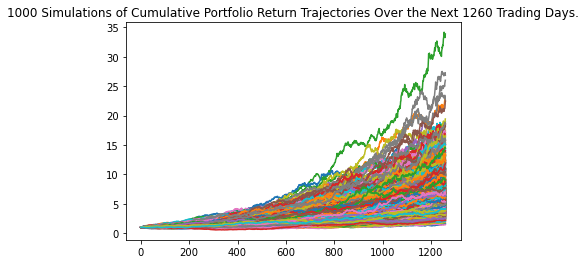

In [7]:
line_plot = MC_even_dist.plot_simulation()

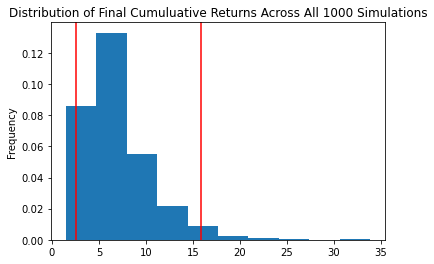

In [8]:
dist_plot = MC_even_dist.plot_distribution() 

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               6.968499
std                3.576505
min                1.469481
25%                4.541911
50%                6.097295
75%                8.383795
max               33.879737
95% CI Lower       2.554321
95% CI Upper      15.840363
Name: 1260, dtype: float64


In [10]:
 # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*10000,2)
even_ci_upper = round(even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in the portfolio over the next 5 years will end within in the range of $2554.32 and $15840.36.


In [11]:
# Try again with: CAT, DE, ODFL, and RTX

In [12]:
# Set the ticker
cat_ticker = "CAT"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2016-06-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-06", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
cat_ticker_data = api.get_barset(
    cat_ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

cat_ticker_data.head()

CAT                                 
                             open    high     low   close   volume
time                                                              
2017-06-15 00:00:00-04:00  103.80  106.64  103.77  104.00  4267912
2017-06-16 00:00:00-04:00  104.32  105.44  103.96  105.18  5135928
2017-06-19 00:00:00-04:00  105.51  105.60  104.26  105.07  2515759
2017-06-20 00:00:00-04:00  105.60  105.71  104.48  104.63  4272278
2017-06-21 00:00:00-04:00  104.22  105.42  100.89  101.14  5349149

In [13]:
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_CAT = MCSimulation(
    portfolio_data = cat_ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [14]:
MC_CAT.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982992,1.042353,0.974116,1.037806,1.029666,0.997395,0.997663,0.962910,0.980197,0.983053,...,1.026064,1.022826,1.014262,1.034726,0.969745,0.989297,1.012676,0.959901,0.987815,1.009963
2,0.985563,1.010202,0.961264,1.029578,1.010190,0.966672,0.982897,0.963724,1.007470,0.965286,...,1.009982,1.064519,1.037802,1.005929,0.985086,0.934936,1.020511,0.988812,0.992903,1.022333
3,0.987344,1.006941,0.971860,1.029774,1.009574,0.971288,0.978134,0.991655,1.032088,0.944836,...,1.031038,1.085856,1.002444,1.011368,0.975194,0.911923,1.016007,1.032145,0.997613,1.039726
4,0.996239,1.018830,0.995268,1.053696,1.004861,0.990482,0.983335,1.002912,1.020488,0.909250,...,1.041038,1.073346,0.978120,1.036916,0.989706,0.930900,1.007072,1.027943,0.986212,1.037687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.384360,1.812955,2.552577,1.484526,1.583684,2.224705,2.194892,2.695521,5.232807,2.967462,...,2.469571,2.538482,1.898336,0.485800,0.581410,1.842763,1.217475,1.613765,1.630122,1.305177
753,1.323408,1.885054,2.568731,1.457792,1.551134,2.316549,2.238467,2.676436,5.309453,3.007735,...,2.460549,2.576115,1.875877,0.497760,0.586111,1.770484,1.193370,1.647408,1.560580,1.276498
754,1.312038,1.850660,2.696951,1.451480,1.549693,2.370786,2.210236,2.614520,5.477915,3.011079,...,2.500095,2.596637,1.909836,0.488514,0.597004,1.731048,1.220451,1.682075,1.582298,1.279701
755,1.338951,1.855775,2.643546,1.475614,1.558609,2.349100,2.148810,2.593856,5.662021,3.041795,...,2.490500,2.617606,1.964011,0.483180,0.578562,1.746760,1.193562,1.693796,1.574415,1.294514


In [15]:
cat_simulated_returns_data = {
    "mean": list(MC_CAT.simulated_return.mean(axis=1)),
    "median": list(MC_CAT.simulated_return.median(axis=1)),
    "min": list(MC_CAT.simulated_return.min(axis=1)),
    "max": list(MC_CAT.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
cat_simulated_returns = pd.DataFrame(cat_simulated_returns_data)

# Display sample data
cat_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002277,1.001858,0.936848,1.063055
2,1.002256,1.002723,0.915283,1.105482
3,1.004397,1.003327,0.898179,1.117412
4,1.004026,1.002796,0.887388,1.139889


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of CAT Stock Over Next Year'}>

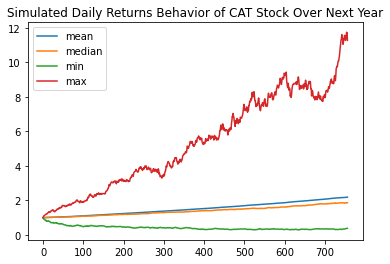

In [16]:
cat_simulated_returns.plot(title="Simulated Daily Returns Behavior of CAT Stock Over Next Year")

In [17]:
initial_investment = 1000

cat_cum_pnl = initial_investment * cat_simulated_returns
cat_cum_pnl.head()

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1002.277199,1001.857789,936.847922,1063.054926
2,1002.255658,1002.723461,915.283269,1105.481904
3,1004.397131,1003.326615,898.179112,1117.411989
4,1004.025736,1002.796204,887.388021,1139.889144


<AxesSubplot:title={'center':'CAT Stock Simulated Outcomes Over Next Year'}>

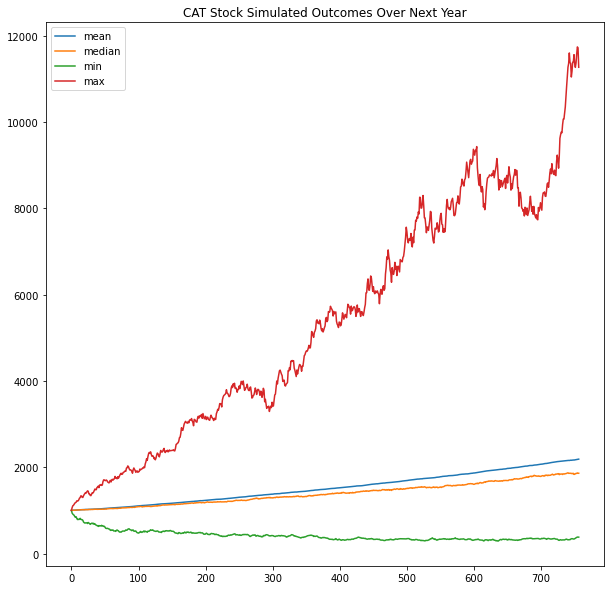

In [18]:
cat_cum_pnl.plot(title="CAT Stock Simulated Outcomes Over Next Year", figsize=(10,10))